<a href="https://colab.research.google.com/github/kim1987/aiffel/blob/main/aiffel/exploration/ex_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import os
import matplotlib.pyplot as plt
import torch

In [ ]:
print(torch.__version__)

1.10.0+cu111


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


전처리(데이터 로드)

In [ ]:
!cp /content/drive/MyDrive/colabdata/aiffel/ex_one/data.zip /content

In [ ]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: paper/
  inflating: paper/73.jpg            
  inflating: paper/56.jpg            
  inflating: paper/35.jpg            
  inflating: paper/86.jpg            
  inflating: paper/61.jpg            
  inflating: paper/14.jpg            
  inflating: paper/54.jpg            
  inflating: paper/57.jpg            
  inflating: paper/84.jpg            
  inflating: paper/94.jpg            
  inflating: paper/47.jpg            
  inflating: paper/88.jpg            
  inflating: paper/67.jpg            
  inflating: paper/51.jpg            
  inflating: paper/21.jpg            
  inflating: paper/48.jpg            
  inflating: paper/1.jpg             
  inflating: paper/43.jpg            
  inflating: paper/13.jpg            
  inflating: paper/69.jpg            
  inflating: paper/28.jpg            
  inflating: paper/17.jpg            
  inflating: paper/81.jpg            
  inflating: paper/62.jpg            
  inflating: paper/45.jpg            
  

In [ ]:
datapath = "/content/"
list_path=["paper","scissor","rock"]

In [ ]:
imgs = np.array([])
labels = np.array([])

In [ ]:
rgb_weights = [0.2989, 0.5870, 0.1140]

In [ ]:
for choice in list_path:
  with os.scandir(datapath + choice) as img_path:
    label_dic = {'rock':0,'paper':1,'scissor':2}
    label = label_dic[choice]
    for idx,img in enumerate(img_path):

      read_img = np.array(Image.open(os.path.join(datapath+choice,img)).resize((28,28),Image.ANTIALIAS))
      read_img = np.dot(read_img[...,:3],rgb_weights).reshape((1,1,28,28))
      if len(imgs) != 0:
        imgs = np.append(imgs,read_img,axis=0)
      else:
        imgs = np.array(read_img)
        labels = np.array([label])

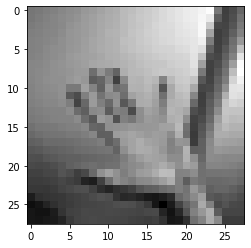

In [ ]:
plt.imshow(imgs[0][0,:],cmap = plt.get_cmap("gray"))

In [ ]:
import torchvision.transforms as transforms
class CustomDataset(torch.utils.data.Dataset):
    
    def __init__(self,datapath,list_path,transform=None ):
      self.datapath = datapath
      self.list_path = list_path
      self.label_dic = {'rock':0,'paper':1,'scissor':2}
      self.rgb_weights = [0.2989, 0.5870, 0.1140]
      self.transform = transform
      self.img_path_list=[]
      for choice in self.list_path:
          self.img_path_list.extend([self.datapath+choice+'/'+x for x in os.listdir(self.datapath + choice)])
    def __len__(self):
      return len(self.img_path_list)

    def __getitem__(self, idx):
      path = img_path_list[idx]
      #label=torch.Tensor([self.label_dic[path.split('/')[-2]]]).type(torch.long)
      label = self.label_dic[path.split('/')[-2]]
      if self.transform == None:
          read_img = Image.open(path)
          transform = transforms.Compose([transforms.PILToTensor(),transforms.ConvertImageDtype(torch.float),transforms.Resize((28,28),antialias=False)#,transforms.Grayscale(num_output_channels=1),
                                         #transforms.Normalize((0.5,0.5,0.5),(1,1,1))
                                         ])
          read_img = transform(read_img)
      else:
          self.transform(Image.open(path))
      

      return read_img, label

In [ ]:
datapath = "/content/"
list_path=["paper","scissor","rock"]

In [ ]:
train_set = CustomDataset(datapath,list_path)

In [ ]:
test_set = CustomDataset(datapath+'test/',list_path)

In [ ]:
from torch.utils.data import DataLoader
train_load = DataLoader(train_set,batch_size=20,shuffle=True)
test_load = DataLoader(test_set,batch_size=20,shuffle=True)

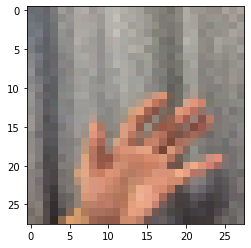

In [ ]:
plt.imshow((train_set[2][0]).permute(1,2,0))
plt.show()

In [ ]:
train_set[0][0]

tensor([[[-0.1137, -0.1333, -0.1618,  ...,  0.1441,  0.0324,  0.0863],
         [-0.1206, -0.1510, -0.1520,  ...,  0.0657,  0.0971,  0.0833],
         [-0.0941, -0.1343, -0.1745,  ...,  0.1225,  0.0882,  0.1167],
         ...,
         [-0.0627, -0.1980, -0.3069,  ..., -0.0784, -0.0627, -0.0461],
         [-0.0480, -0.2284,  0.2520,  ..., -0.0657, -0.0931, -0.0225],
         [-0.0725,  0.2441,  0.3255,  ..., -0.0549, -0.0157, -0.0196]],

        [[-0.0784, -0.1039, -0.1343,  ...,  0.1402,  0.0304,  0.0863],
         [-0.0814, -0.1235, -0.1343,  ...,  0.0618,  0.1029,  0.0794],
         [-0.0627, -0.1029, -0.1471,  ...,  0.1186,  0.0765,  0.1147],
         ...,
         [-0.0657, -0.2020, -0.3598,  ..., -0.0794, -0.0588, -0.0480],
         [-0.0804, -0.2480,  0.0931,  ..., -0.0618, -0.0951, -0.0363],
         [-0.1049,  0.0647,  0.1088,  ..., -0.0627, -0.0235, -0.0284]],

        [[-0.0510, -0.0863, -0.1069,  ...,  0.1206,  0.0098,  0.0549],
         [-0.0363, -0.0745, -0.1049,  ...,  0

In [ ]:
test_set[0][0].shape

torch.Size([3, 28, 28])

In [ ]:
test_set[0][1]

1

모델

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class RSPModel(nn.Module):


    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,kernel_size=(4,4),padding='same')
        self.conv2 = nn.Conv2d(32,256,kernel_size=(4,4),padding='same')
        
        self.max_pool1 = nn.MaxPool2d((2,2))
        self.max_pool2 = nn.MaxPool2d((2,2))

        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        self.relu3 = nn.ReLU()

        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(256*7*7,128)
        self.linear2 = nn.Linear(128,3)

        self.softm = nn.Softmax(dim=1)

    def forward(self,inputs):
      x = self.conv1(inputs)
      x = self.relu1(x)
      x = self.max_pool1(x)
    
      x = self.conv2(x)
      x = self.relu2(x)
      x = self.max_pool2(x)

      x = self.flatten(x)

      x = self.linear1(x)
      x = self.relu3(x)
      x = self.linear2(x)
      x = self.softm(x)
      return x

In [ ]:
from torchsummary import summary

In [ ]:
summary(RSPModel(),(3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           1,568
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4          [-1, 256, 14, 14]         131,328
              ReLU-5          [-1, 256, 14, 14]               0
         MaxPool2d-6            [-1, 256, 7, 7]               0
           Flatten-7                [-1, 12544]               0
            Linear-8                  [-1, 128]       1,605,760
              ReLU-9                  [-1, 128]               0
           Linear-10                    [-1, 3]             387
          Softmax-11                    [-1, 3]               0
Total params: 1,739,043
Trainable params: 1,739,043
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forw

훈련

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 30 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
#end='\r', flush=True)

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
def initialize_weights(m):
  if isinstance(m, nn.Conv2d):
      nn.init.kaiming_uniform_(m.weight.data,nonlinearity='relu')
      if m.bias is not None:
          nn.init.constant_(m.bias.data, 0)
#  elif isinstance(m, nn.BatchNorm2d):
#      nn.init.constant_(m.weight.data, 1)
#      nn.init.constant_(m.bias.data, 0)
  elif isinstance(m, nn.Linear):
      nn.init.kaiming_uniform_(m.weight.data)
      nn.init.constant_(m.bias.data, 0)
#  classname = m.__class__.__name__
#      if classname.find('Conv') != -1:

In [ ]:
model = RSPModel().to(device)

In [ ]:
model.apply(initialize_weights)

RSPModel(
  (conv1): Conv2d(3, 32, kernel_size=(4, 4), stride=(1, 1), padding=same)
  (conv2): Conv2d(32, 256, kernel_size=(4, 4), stride=(1, 1), padding=same)
  (max_pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (max_pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (relu1): ReLU()
  (relu2): ReLU()
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=12544, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=3, bias=True)
  (softm): Softmax(dim=1)
)

In [ ]:
#원 핫 인코딩일시 sse 등 이용
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.8)

In [ ]:
epochs = 20 # 100 before.
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_load, model, loss_fn, optimizer)



print("Done!")

Epoch 1
-------------------------------
loss: 0.690237  [    0/  300]
Epoch 2
-------------------------------
loss: 0.699108  [    0/  300]
Epoch 3
-------------------------------
loss: 0.701858  [    0/  300]
Epoch 4
-------------------------------
loss: 0.695202  [    0/  300]
Epoch 5
-------------------------------
loss: 0.691370  [    0/  300]
Epoch 6
-------------------------------
loss: 0.726126  [    0/  300]
Epoch 7
-------------------------------
loss: 0.693208  [    0/  300]
Epoch 8
-------------------------------
loss: 0.719257  [    0/  300]
Epoch 9
-------------------------------
loss: 0.778880  [    0/  300]
Epoch 10
-------------------------------
loss: 0.637828  [    0/  300]
Epoch 11
-------------------------------
loss: 0.734966  [    0/  300]
Epoch 12
-------------------------------
loss: 0.727820  [    0/  300]
Epoch 13
-------------------------------
loss: 0.636246  [    0/  300]
Epoch 14
-------------------------------
loss: 0.681537  [    0/  300]
Epoch 15
------

In [ ]:
test(test_load, model, loss_fn)

Test Error: 
 Accuracy: 94.0%, Avg loss: 0.685838 



In [ ]:
model(test_set[200][0].unsqueeze(0)).argmax(1) == test_set[200][1]

tensor([True])

In [ ]:
model(test_set[105][0].unsqueeze(0))

tensor([[3.8708e-12, 1.0000e+00, 8.5816e-10]], grad_fn=<SoftmaxBackward0>)

In [ ]:
test_set[101][1]

2

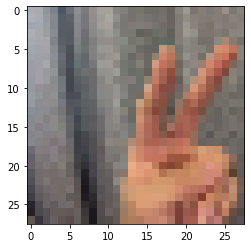

In [ ]:
plt.imshow(test_set[101][0].permute(1,2,0))

In [ ]:
model(test_set[101][0].unsqueeze(0))
print(loss_fn(model(test_set[101][0].unsqueeze(0)),torch.Tensor([test_set[101][1]]).type(torch.long)))

tensor(0.5664, grad_fn=<NllLossBackward0>)


In [ ]:
nn.functional.softmax(model(test_set[100][0].unsqueeze(0))).argmax(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([2])